In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
url = 'https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17.htm'

headers = {'accept': '*/*','User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.53','Accept-Language': 'en-US,en;q=0.9,it;q=0.8,es;q=0.7','referer': 'https://www.google.com/','cookie': 'DSID=AAO-7r4OSkS76zbHUkiOpnI0kk-X19BLDFF53G8gbnd21VZV2iehu-w_2v14cxvRvrkd_NjIdBWX7wUiQ66f-D8kOkTKD1BhLVlqrFAaqDP3LodRK2I0NfrObmhV9HsedGE7-mQeJpwJifSxdchqf524IMh9piBflGqP0Lg0_xjGmLKEQ0F4Na6THgC06VhtUG5infEdqMQ9otlJENe3PmOQTC_UeTH5DnENYwWC8KXs-M4fWmDADmG414V0_X0TfjrYu01nDH2Dcf3TIOFbRDb993g8nOCswLMi92LwjoqhYnFdf1jzgK0'}

response = requests.get(url, headers=headers)

In [3]:
response

<Response [200]>

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

<!DOCTYPE html>
<html lang="en" style="height: 100%;" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/"><head><link href="/jobSearch/static/css/gd-jobSearch.6e8fd.css" media="all" rel="stylesheet"/><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="#0caa41" name="theme-color"/><meta content="#0caa41" name="msapplication-navbutton-color"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="#0caa41" name="apple-mobile-web-app-status-bar-style"/><meta content="no-cache,must-revalidate" http-equiv="Cache-Control"/><meta content="no-cache" http-equiv="Pragma"/><meta content="0" http-equiv="Expires"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><link href="/manifest.json" rel="manifest"/><link href="/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/><link href="/favicon.ico" rel="icon" type="image/x-icon"/><link crossorigin="true" href="https://fonts.gstatic.com" rel="p
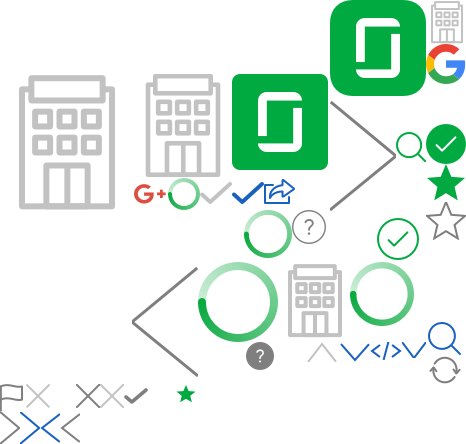
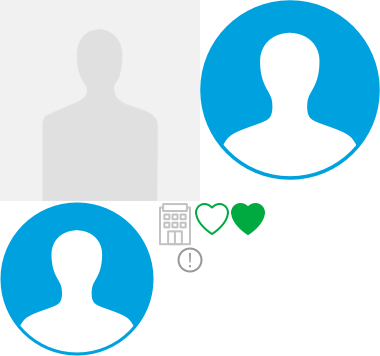
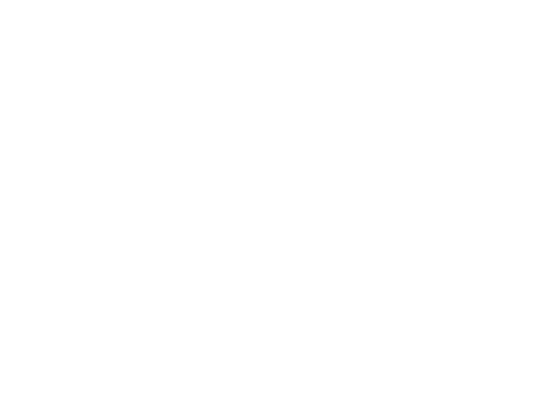
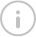

In [5]:
soup

In [6]:
content = soup.find_all('div', class_='d-flex flex-column pl-sm css-l2fjlt css-1of6cnp e1rrn5ka4')

#### Attributes to extract
- company name
- job title
- salary
- location


In [7]:
company_name = []
job_title = []
salary = []
location = []


    
for x in content:
    
    company_name.append(x.find('a').span.text)
    
    job_title.append(x.find_all('a')[1].span.text)
        
    try:
        salary.append(x.find_all('span')[5])
    except:
        salary.append(np.nan)
        
    location.append(x.find_all('span')[4].text)
        
    
    d = {'company_name':company_name, 'job_title' : job_title, 'salary':salary, 'location':location}
    
    data = pd.DataFrame(d)


In [8]:
data.head()

,company_name,job_title,salary,location
0,Microsoft,Data & Applied Scientist,"[$101K - $152K , [(Glassdoor est.)], [[<path d...","Redmond, WA"
1,Notion,"Data Scientist, Growth","[$112K - $170K , [(Glassdoor est.)], [[<path d...","New York, NY"
2,NOVUS Professional Services Inc.,Data Scientist (No C2C),"[$50.00 - $90.00 Per Hour, [(Employer est.)], ...",Remote
3,FirstEnergy Corp,Data Scientist Remote,"[$72K - $109K , [(Glassdoor est.)], [[<path d=...","Akron, OH"
4,Ntropy Network,Data Scientist,"[$130K - $180K , [(Employer est.)], [[<path d=...",Remote


In [9]:
# extracting ratings 
ratings = []

try: 
    for x in (soup.find_all('span', class_='css-19pjha7 e1cjmv6j1')):
        ratings.append(x.text)
except:
    ratings.append(np.nan)

In [10]:
data = pd.concat([data,pd.Series(ratings)],axis=1)

In [11]:
data.rename(columns={0 : 'ratings'},inplace=True)

In [12]:
data.head()

,company_name,job_title,salary,location,ratings
0,Microsoft,Data & Applied Scientist,"[$101K - $152K , [(Glassdoor est.)], [[<path d...","Redmond, WA",4.4
1,Notion,"Data Scientist, Growth","[$112K - $170K , [(Glassdoor est.)], [[<path d...","New York, NY",4.9
2,NOVUS Professional Services Inc.,Data Scientist (No C2C),"[$50.00 - $90.00 Per Hour, [(Employer est.)], ...",Remote,4.6
3,FirstEnergy Corp,Data Scientist Remote,"[$72K - $109K , [(Glassdoor est.)], [[<path d=...","Akron, OH",3.7
4,Ntropy Network,Data Scientist,"[$130K - $180K , [(Employer est.)], [[<path d=...",Remote,4.2


In [13]:
#links 

links = []
for i in soup.find_all('div', class_='d-flex flex-column pl-sm css-l2fjlt css-1of6cnp e1rrn5ka4'):
    link = 'https://www.glassdoor.co.in'+i.a['href']
    links.append(link)

In [14]:
len(links)

30

In [15]:
data = pd.concat([data, pd.Series(links)],axis=1)

In [16]:
data.rename(columns={0 : 'links'},inplace=True)

In [17]:
data.head()

,company_name,job_title,salary,location,ratings,links
0,Microsoft,Data & Applied Scientist,"[$101K - $152K , [(Glassdoor est.)], [[<path d...","Redmond, WA",4.4,https://www.glassdoor.co.in/partner/jobListing...
1,Notion,"Data Scientist, Growth","[$112K - $170K , [(Glassdoor est.)], [[<path d...","New York, NY",4.9,https://www.glassdoor.co.in/partner/jobListing...
2,NOVUS Professional Services Inc.,Data Scientist (No C2C),"[$50.00 - $90.00 Per Hour, [(Employer est.)], ...",Remote,4.6,https://www.glassdoor.co.in/partner/jobListing...
3,FirstEnergy Corp,Data Scientist Remote,"[$72K - $109K , [(Glassdoor est.)], [[<path d=...","Akron, OH",3.7,https://www.glassdoor.co.in/partner/jobListing...
4,Ntropy Network,Data Scientist,"[$130K - $180K , [(Employer est.)], [[<path d=...",Remote,4.2,https://www.glassdoor.co.in/partner/jobListing...


In [18]:
final = pd.DataFrame()

for j in range(1,31):
    url = 'https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP{}.htm?includeNoSalaryJobs=true'.format(j)
    headers = {'accept': '*/*','User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.53','Accept-Language': 'en-US,en;q=0.9,it;q=0.8,es;q=0.7','referer': 'https://www.google.com/','cookie': 'DSID=AAO-7r4OSkS76zbHUkiOpnI0kk-X19BLDFF53G8gbnd21VZV2iehu-w_2v14cxvRvrkd_NjIdBWX7wUiQ66f-D8kOkTKD1BhLVlqrFAaqDP3LodRK2I0NfrObmhV9HsedGE7-mQeJpwJifSxdchqf524IMh9piBflGqP0Lg0_xjGmLKEQ0F4Na6THgC06VhtUG5infEdqMQ9otlJENe3PmOQTC_UeTH5DnENYwWC8KXs-M4fWmDADmG414V0_X0TfjrYu01nDH2Dcf3TIOFbRDb993g8nOCswLMi92LwjoqhYnFdf1jzgK0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    
    company_name = []
    job_title = []
    salary = []
    location = []


    for x in content:
    
        company_name.append(x.find('a').span.text)
        
        job_title.append(x.find_all('a')[1].span.text)
        try:
            salary.append(x.find_all('span')[5].text.strip())
        except:
            salary.append(np.nan)
        
        location.append(x.find_all('span')[4].text)
        
        
        links = []    
        for i in soup.find_all('div', class_='d-flex flex-column pl-sm css-l2fjlt css-1of6cnp e1rrn5ka4'):
            link = 'https://www.glassdoor.co.in'+i.a['href']
            links.append(link)
            
    
    d = {'company_name':company_name, 'job_title' : job_title, 'salary':salary, 'location':location, 'links': links}
    data = pd.DataFrame(d)
    final = pd.concat([final, data], axis=0, ignore_index=True)

In [19]:
final.head()

,company_name,job_title,salary,location,links
0,Microsoft,Data & Applied Scientist,$101K - $152K (Glassdoor est.),"Redmond, WA",https://www.glassdoor.co.in/partner/jobListing...
1,Notion,"Data Scientist, Growth",$112K - $170K (Glassdoor est.),"New York, NY",https://www.glassdoor.co.in/partner/jobListing...
2,NOVUS Professional Services Inc.,Data Scientist (No C2C),$50.00 - $90.00 Per Hour(Employer est.),Remote,https://www.glassdoor.co.in/partner/jobListing...
3,FirstEnergy Corp,Data Scientist Remote,$72K - $109K (Glassdoor est.),"Akron, OH",https://www.glassdoor.co.in/partner/jobListing...
4,Ntropy Network,Data Scientist,$130K - $180K (Employer est.),Remote,https://www.glassdoor.co.in/partner/jobListing...


In [20]:
final.salary.isna().sum() / len(final['salary']) * 100

26.666666666666668

In [21]:
final.shape

(900, 5)

In [22]:
final['city'] = pd.DataFrame(final['location'].str.split(',').apply(lambda x: (x[0])))

In [23]:
final['state_code'] = pd.DataFrame(final['location'].str.split(',').apply(lambda x: (x[-1])))

In [24]:
final.drop('location', axis=1, inplace=True)

In [25]:
final

,company_name,job_title,salary,links,city,state_code
0,Microsoft,Data & Applied Scientist,$101K - $152K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Redmond,WA
1,Notion,"Data Scientist, Growth",$112K - $170K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,New York,NY
2,NOVUS Professional Services Inc.,Data Scientist (No C2C),$50.00 - $90.00 Per Hour(Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote
3,FirstEnergy Corp,Data Scientist Remote,$72K - $109K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Akron,OH
4,Ntropy Network,Data Scientist,$130K - $180K (Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote
...,...,...,...,...,...,...
895,Ztek Consulting,Data Scientist,$104K - $158K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Mountain View,CA
896,Augray,Junior Data Scientist,$55K - $60K (Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Brookfield,WI
897,Pathward,Data Scientist,NaN,https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote
898,Tetra Tech,"Data Scientist, Engineer",$70K - $120K (Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Kingston,RI


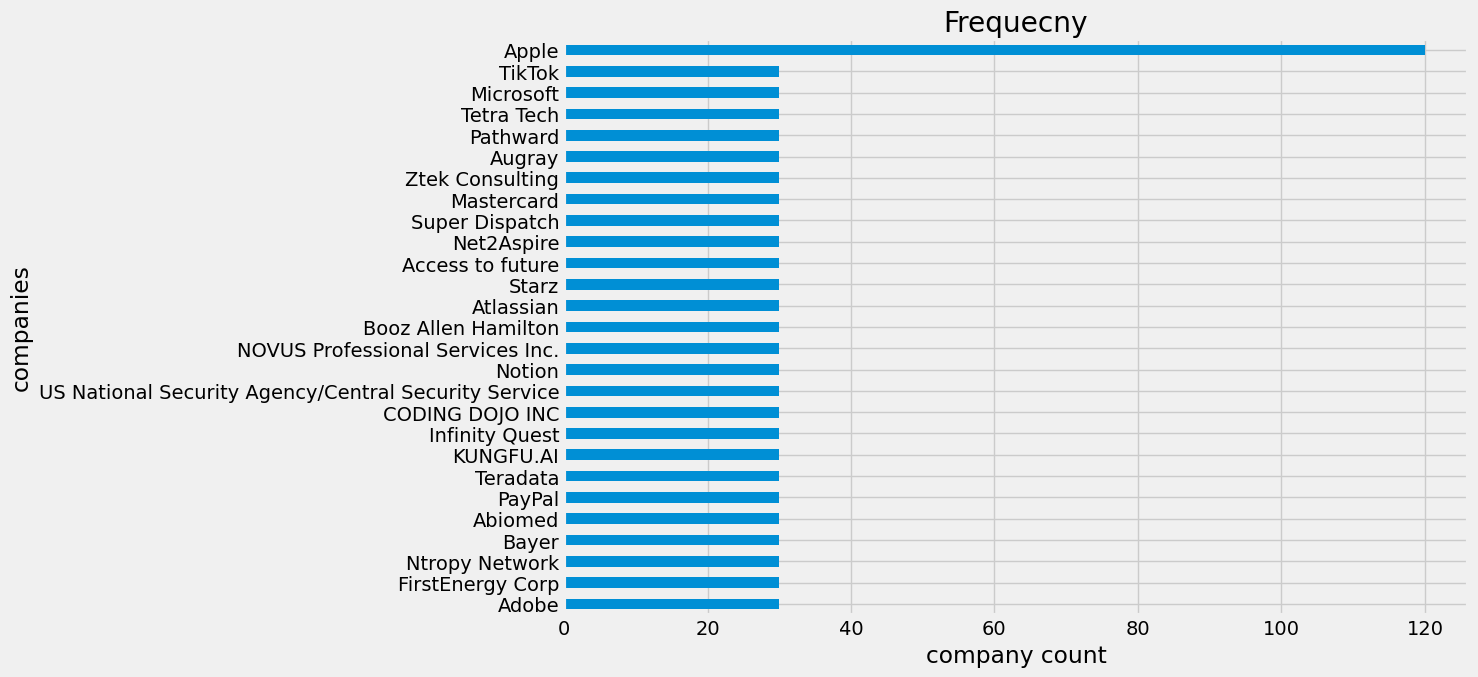

In [26]:
plt.figure(figsize=(15,7))
final['company_name'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('company count')
plt.ylabel('companies')
plt.title('Frequecny')
plt.tight_layout()
plt.show()

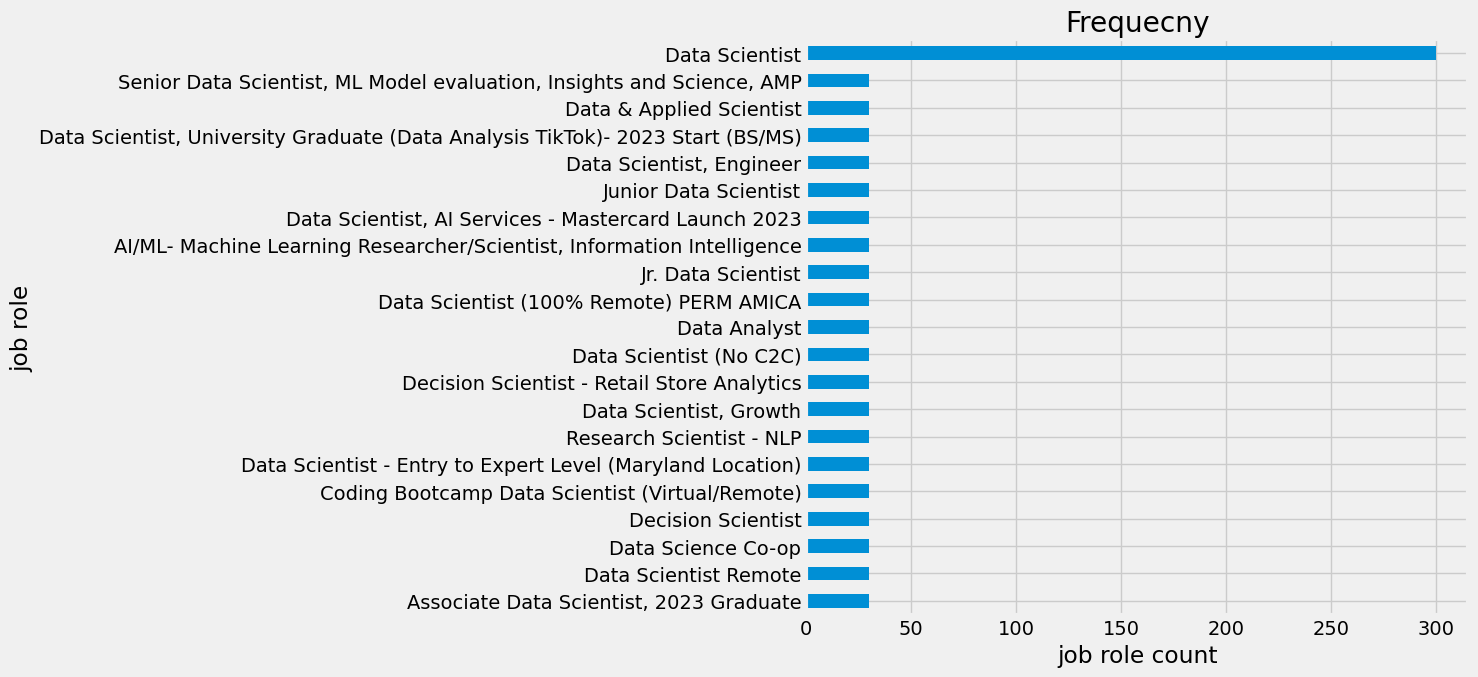

In [27]:
plt.figure(figsize=(15,7))
final['job_title'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('job role count')
plt.ylabel('job role')
plt.title('Frequecny')
plt.tight_layout()
plt.show()

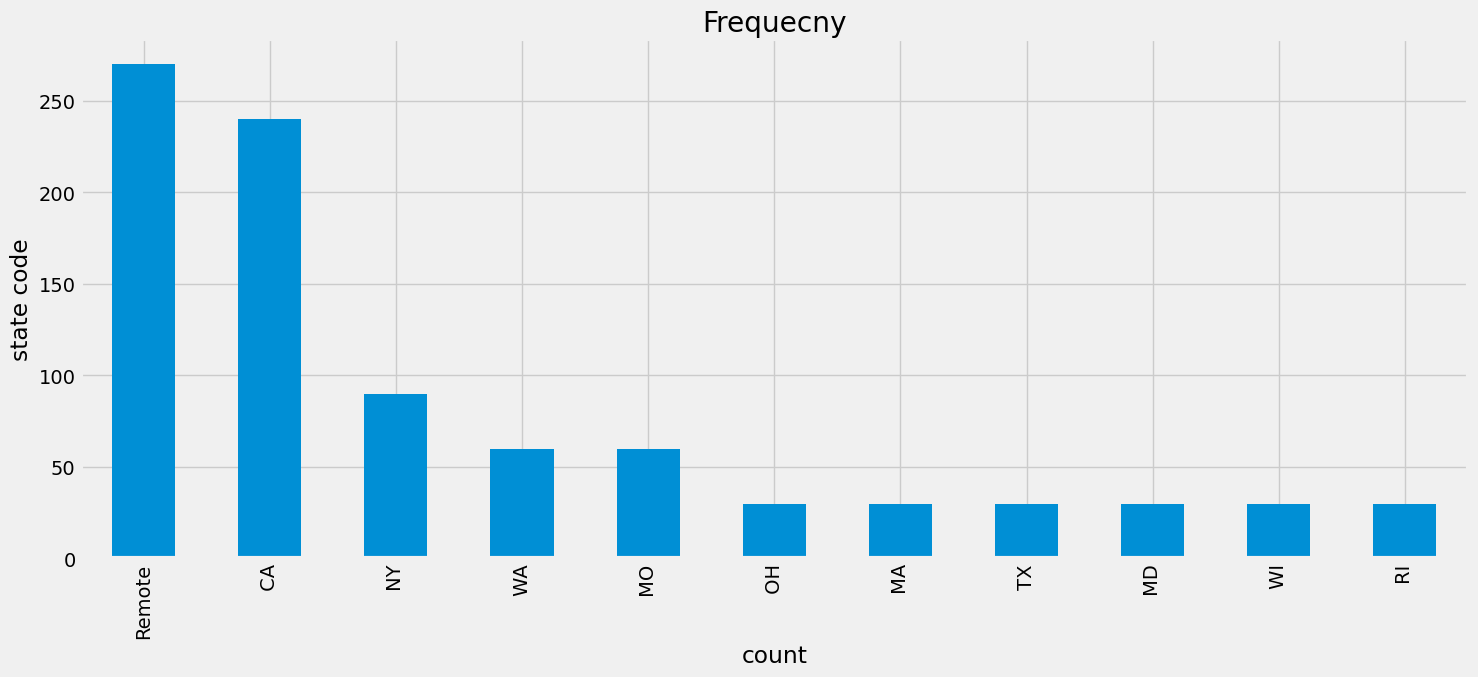

In [28]:
plt.figure(figsize=(15,7))
final['state_code'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('count')
plt.ylabel('state code')
plt.title('Frequecny')
plt.tight_layout()
plt.show()

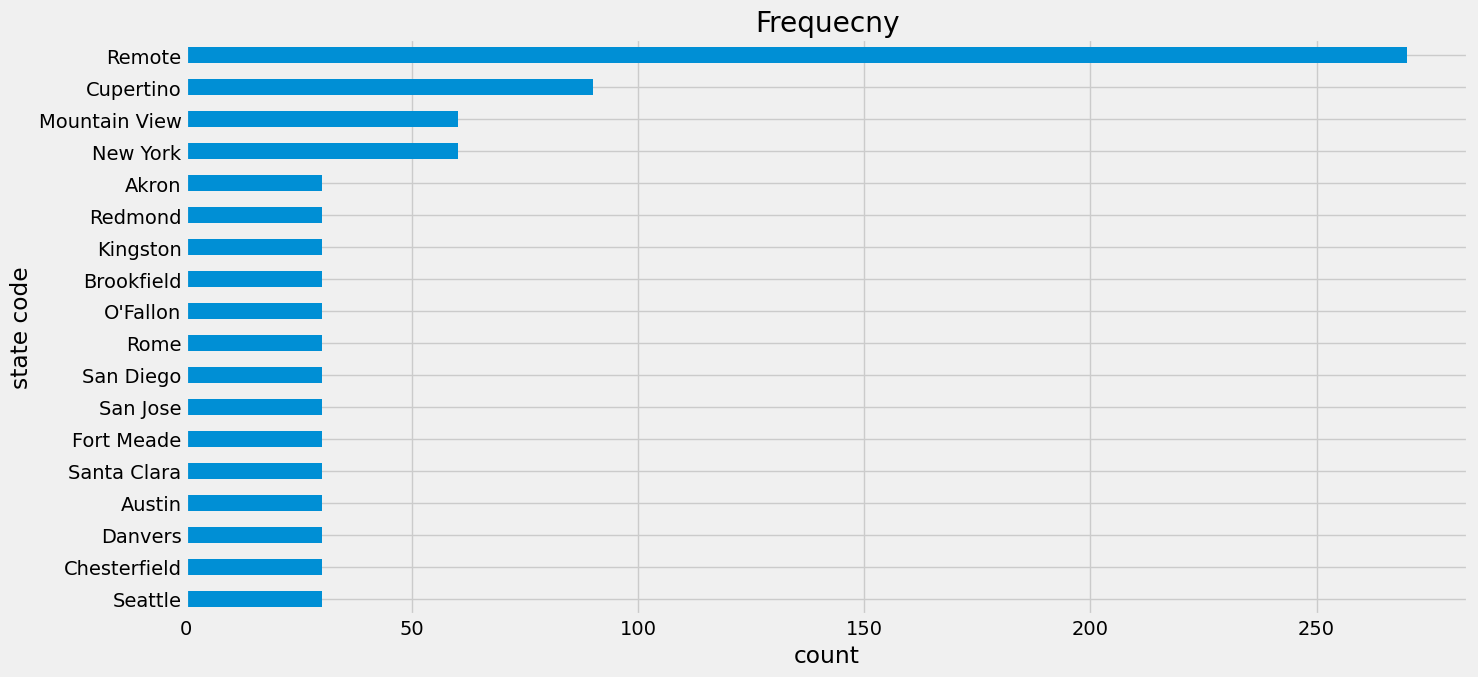

In [29]:
plt.figure(figsize=(15,7))
final['city'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('state code')
plt.title('Frequecny')
plt.tight_layout()


plt.show()

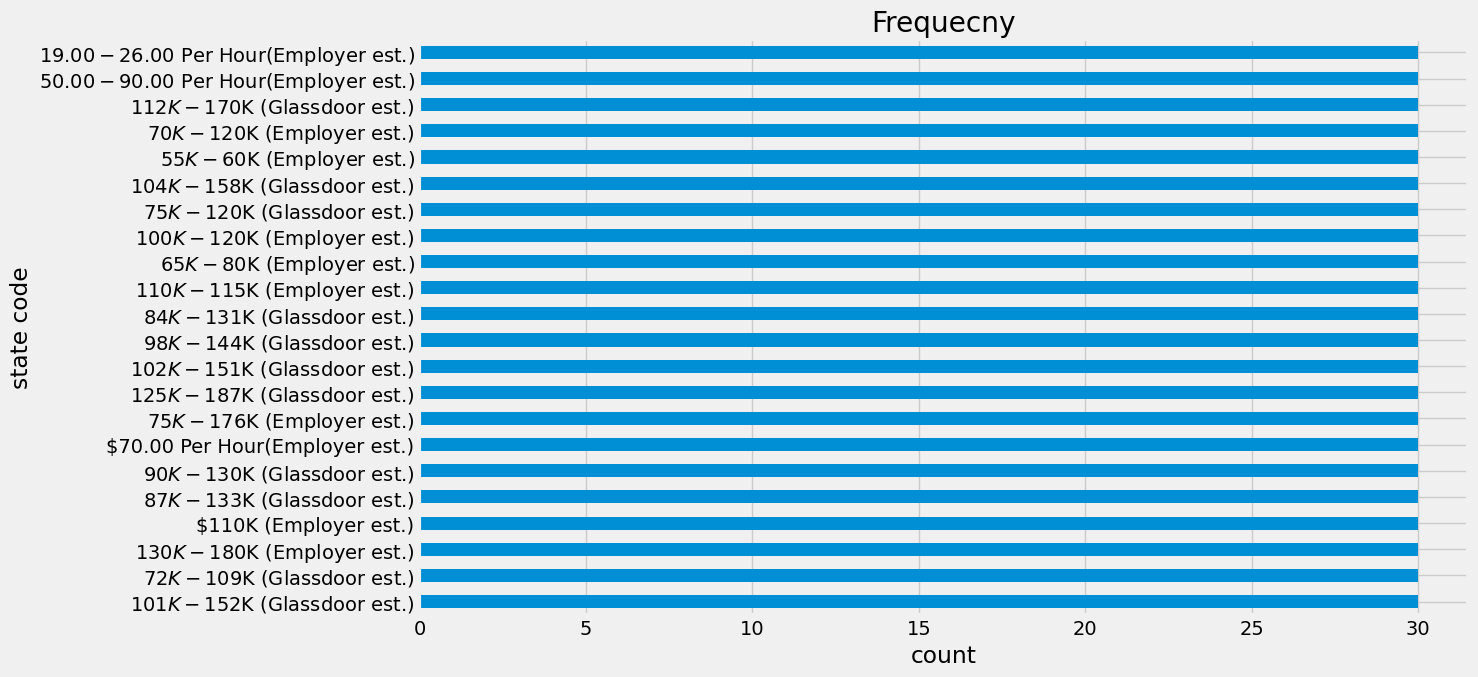

In [30]:
plt.figure(figsize=(15,7))
final['salary'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('state code')
plt.title('Frequecny')
plt.tight_layout()

plt.show()

In [31]:
#cleaning data
salary = final['salary']

In [32]:
salary = salary.apply(lambda x: str(x).replace('(Glassdoor est.)', ''))

In [33]:
final['per_hour'] = salary.apply(lambda x: 1 if 'Per Hour(Employer est.)' in x else 0)

In [34]:
salary = salary.apply(lambda x: str(x).replace('(Employer est.)', ''))

In [35]:
salary = salary.apply(lambda x: x.replace('K', '').replace('$', ''))

In [36]:
salary = salary.apply(lambda x: x.replace('Per Hour', ''))

In [38]:
final['min_salary'] = salary.apply(lambda x: float(x.split('-')[0]))

In [39]:
final['max_salary'] = salary.apply(lambda x: float(x.split('-')[-1]))

In [46]:
final['average_salary'] = ((final['min_salary'] / final['max_salary']) * 100)

In [62]:
final.average_salary = final['average_salary'].round(decimals=0)

In [64]:
final.head(7)

,company_name,job_title,salary,links,city,state_code,per_hour,min_salary,max_salary,average_salary
0,Microsoft,Data & Applied Scientist,$101K - $152K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Redmond,WA,0,101.0,152.0,66.0
1,Notion,"Data Scientist, Growth",$112K - $170K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,New York,NY,0,112.0,170.0,66.0
2,NOVUS Professional Services Inc.,Data Scientist (No C2C),$50.00 - $90.00 Per Hour(Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote,1,50.0,90.0,56.0
3,FirstEnergy Corp,Data Scientist Remote,$72K - $109K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Akron,OH,0,72.0,109.0,66.0
4,Ntropy Network,Data Scientist,$130K - $180K (Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote,0,130.0,180.0,72.0
5,Bayer,Data Scientist,$110K (Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Chesterfield,MO,0,110.0,110.0,100.0
6,Abiomed,Data Science Co-op,$87K - $133K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Danvers,MA,0,87.0,133.0,65.0


In [110]:
final.isna().sum()

company_name        0
job_title           0
salary            240
links               0
city                0
state_code          0
per_hour            0
min_salary        240
max_salary        240
average_salary      0
dtype: int64

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_salary', ylabel='Density'>

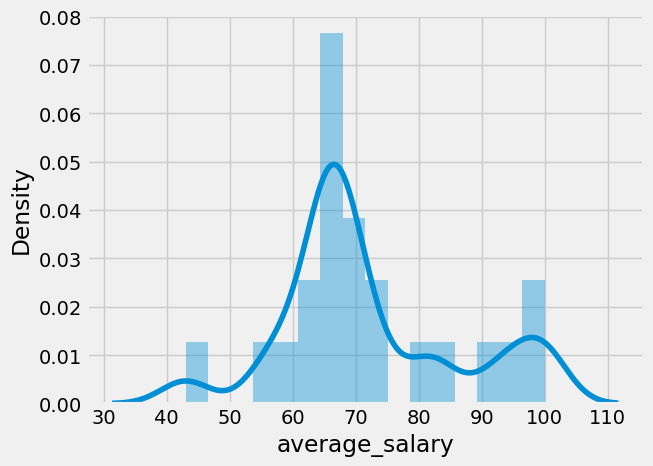

In [77]:
sns.distplot(final.average_salary)

In [80]:
final.head()

,company_name,job_title,salary,links,city,state_code,per_hour,min_salary,max_salary,average_salary
0,Microsoft,Data & Applied Scientist,$101K - $152K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Redmond,WA,0,101.0,152.0,66.0
1,Notion,"Data Scientist, Growth",$112K - $170K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,New York,NY,0,112.0,170.0,66.0
2,NOVUS Professional Services Inc.,Data Scientist (No C2C),$50.00 - $90.00 Per Hour(Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote,1,50.0,90.0,56.0
3,FirstEnergy Corp,Data Scientist Remote,$72K - $109K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Akron,OH,0,72.0,109.0,66.0
4,Ntropy Network,Data Scientist,$130K - $180K (Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote,0,130.0,180.0,72.0


<AxesSubplot:ylabel='company_name'>

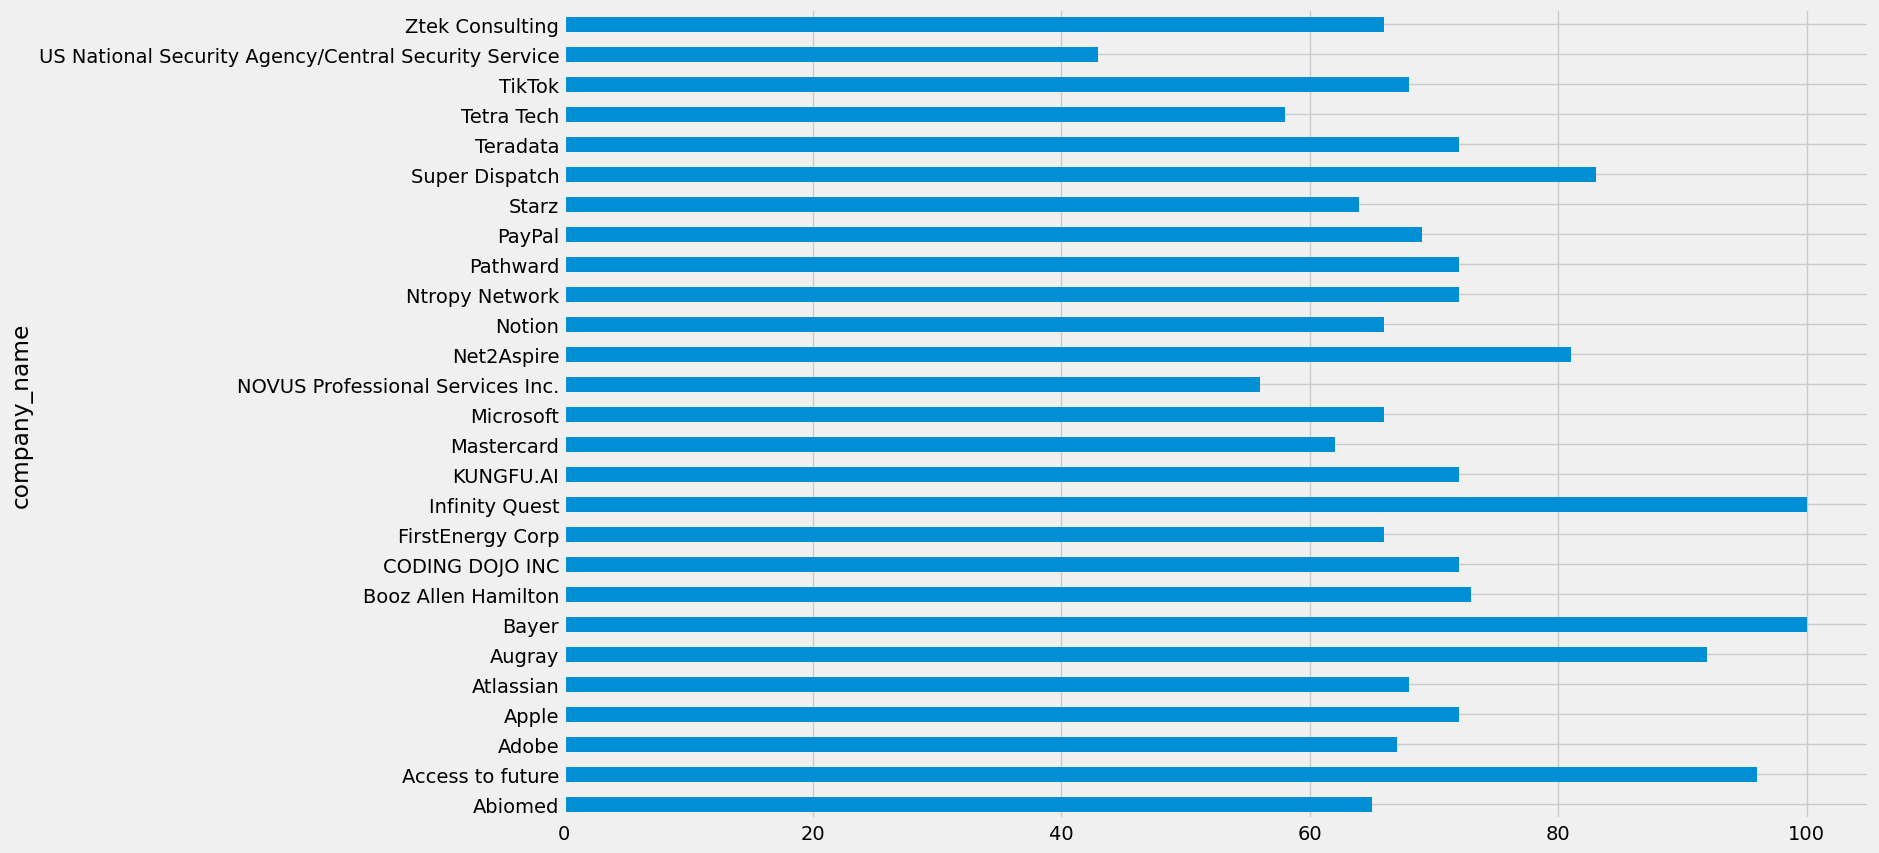

In [112]:
plt.figure(figsize=(15,10))
final.groupby('company_name')['average_salary'].mean().plot(kind='barh')

In [109]:
final[final['company_name'] == 'Apple']['average_salary']

14     72.0
15     72.0
18     72.0
22     72.0
44     72.0
       ... 
862    72.0
884    72.0
885    72.0
888    72.0
892    72.0
Name: average_salary, Length: 120, dtype: float64

In [102]:
len(final[final['company_name'] == 'Apple'])

120

In [105]:
final['average_salary'].fillna(final['average_salary'].mean(), inplace=True)

In [107]:
final.average_salary = final['average_salary'].round(decimals=0)

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_salary', ylabel='Density'>

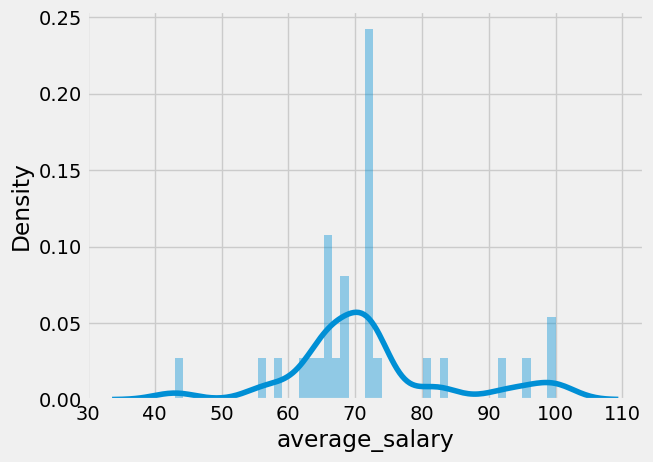

In [111]:
sns.distplot(final.average_salary)

In [114]:
final['average_salary'] = final.average_salary.astype('int')

In [115]:
final

,company_name,job_title,salary,links,city,state_code,per_hour,min_salary,max_salary,average_salary
0,Microsoft,Data & Applied Scientist,$101K - $152K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Redmond,WA,0,101.0,152.0,66
1,Notion,"Data Scientist, Growth",$112K - $170K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,New York,NY,0,112.0,170.0,66
2,NOVUS Professional Services Inc.,Data Scientist (No C2C),$50.00 - $90.00 Per Hour(Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote,1,50.0,90.0,56
3,FirstEnergy Corp,Data Scientist Remote,$72K - $109K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Akron,OH,0,72.0,109.0,66
4,Ntropy Network,Data Scientist,$130K - $180K (Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote,0,130.0,180.0,72
...,...,...,...,...,...,...,...,...,...,...
895,Ztek Consulting,Data Scientist,$104K - $158K (Glassdoor est.),https://www.glassdoor.co.in/partner/jobListing...,Mountain View,CA,0,104.0,158.0,66
896,Augray,Junior Data Scientist,$55K - $60K (Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Brookfield,WI,0,55.0,60.0,92
897,Pathward,Data Scientist,NaN,https://www.glassdoor.co.in/partner/jobListing...,Remote,Remote,0,NaN,NaN,72
898,Tetra Tech,"Data Scientist, Engineer",$70K - $120K (Employer est.),https://www.glassdoor.co.in/partner/jobListing...,Kingston,RI,0,70.0,120.0,58
